In [184]:
# 导入需要的包以及解决中文乱码的问题
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd 
import numpy as np

cd_second_data = pd.read_csv(r'./datas/chengdu/secondHand.csv',encoding="gbk", parse_dates=['日期'])
cd_regions = ['中心城区', '郊区新城', '全市']
show_region_idx = 2
cd_columns = ['总面积（平方米）', '住宅套数(套)', '住宅面积(平方米)', '非住宅面积（平方米）']

cd_bussiness_data = pd.read_csv(r'./datas/chengdu/bussiness.csv',encoding="gbk", parse_dates=['日期'])

rm_weekend = True  # 是否删除周末数据
show_polyfit = True  # 曲线拟合
resample_by = ''    # W（星期），M（月），Q（季度），Y（年），10D（10天），3W（3周）
resample_func = 'sum'  # mean, sum

In [185]:
from datetime import datetime

def is_workday(day, separator=""):
    """
    if a day is workday
    :param day:
    :param separator: separator of year, month and day, default is empty
    :return: True: is workday; False: not workday
    """

    if day.weekday() in [0, 1, 2, 3, 4]:
        return True
    else:
        return False


def is_weekend(day, separator=""):
    """
    if a day is weekend
    :param day: 
    :param separator: separator of year, month and day, default is empty
    :return: True: is weekend; False: not weekend
    """
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [5, 6]:
        return True
    else:
        return False
    
def group_data(data, key_word=None, names=None):
    data_list = []
    data = data.dropna(axis=0, how='any')
    if key_word is not None and names is not None :
        for name in names:
            data_i = data[data[key_word] == name]
            data_i.drop(columns=key_word, inplace=True)
            data_list.append(data_i)
        return data_list
    else:
        return [data]

def preprocess(data):
    data['is_workday']=data['日期'].map(lambda x:is_workday(x))
    if rm_weekend:
        data.drop(data[data['is_workday'] == False].index, inplace=True)
        data.drop(columns='is_workday', inplace=True)

    data.set_index('日期', drop=True, inplace=True)
    if resample_by is not None and len(resample_by) > 0:
        if resample_func == 'sum':
            data = data.resample(resample_by).sum()
        elif resample_func == 'mean':
            data = data.resample(resample_by).mean()
    return data

def all_preprocess(data, key_word=None, names=None):
    data_list = group_data(data, key_word, names)
    for i, data in enumerate(data_list):
        data_list[i] = preprocess(data)
    return data_list

In [186]:
cd_region_data_list = all_preprocess(cd_second_data, '区域', cd_regions)
cd_region_data_list2 = all_preprocess(cd_bussiness_data, '区域', cd_regions)
print(cd_region_data_list[-1])
   

             总面积（平方米）  住宅套数(套)  住宅面积(平方米)  非住宅面积（平方米）
日期                                                   
2023-05-29  168256.00   1019.0  139537.61    28718.39
2023-05-30   87880.54    799.0   76042.39    11838.15
2023-05-31   85042.40    783.0   76588.45     8453.95
2023-06-01   80952.21    773.0   73856.74     7095.47
2023-06-02   83195.47    769.0   74002.91     9192.56
2023-06-05  108401.01   1022.0   98594.23     9806.78
2023-06-06   84246.35    798.0   77200.06     7046.29
2023-06-07   84038.59    783.0   76695.51     7343.08
2023-06-08   93736.19    869.0   84680.76     9055.43
2023-06-13   89933.43    819.0   78434.20    11499.23
2023-06-14   77858.64    692.0   67548.53    10310.11
2023-06-15   86682.71    808.0   78119.11     8563.60
2023-06-16   91312.90    832.0   80365.02    10947.88
2023-06-19  104235.40    961.0   92647.02    11588.38
2023-06-20  112465.10    799.0   79391.12    33073.98
2023-06-21   81980.15    722.0   69182.42    12797.73
2023-06-27   87238.40    779

In [187]:
def show_lineplot(data, date, cd_columns):

    fig, axs = plt.subplots(2, 2, figsize=(30, 25), dpi=100, sharex=True)

    axs[0, 0].plot(date, data[cd_columns[0]], label=cd_columns[0])
    axs[0, 0].scatter(date, data[cd_columns[0]])
    axs[0, 0].set_title(cd_columns[0], fontdict={'size': 20})

    axs[0, 1].plot(date, data[cd_columns[1]], label=cd_columns[1])
    axs[0, 1].scatter(date, data[cd_columns[1]])
    axs[0, 1].set_title(cd_columns[1], fontdict={'size': 20})
    
    axs[1, 0].plot(date, data[cd_columns[2]], label=cd_columns[2])
    axs[1, 0].scatter(date, data[cd_columns[2]])
    axs[1, 0].set_title(cd_columns[2], fontdict={'size': 20})
    
    axs[1, 1].plot(date, data[cd_columns[3]], label=cd_columns[3])
    axs[1, 1].scatter(date, data[cd_columns[3]])
    axs[1, 1].set_title(cd_columns[3], fontdict={'size': 20})

    axs[0, 0].legend(loc='best')
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)
    axs[0, 0].set_xlabel("日期", fontdict={'size': 16})
    axs[0, 1].legend(loc='best')
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)
    axs[0, 1].set_xlabel("日期", fontdict={'size': 16})
    axs[1, 0].legend(loc='best')
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)
    axs[1, 0].set_xlabel("日期", fontdict={'size': 16})
    axs[1, 1].legend(loc='best')
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)
    axs[1, 1].set_xlabel("日期", fontdict={'size': 16})
    
    if show_polyfit:
        # 绘制拟合曲线
        deg = 2
        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[0]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[0, 0].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[1]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[0, 1].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[2]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[1, 0].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[3]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[1, 1].plot(date, y_value)

    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.show()

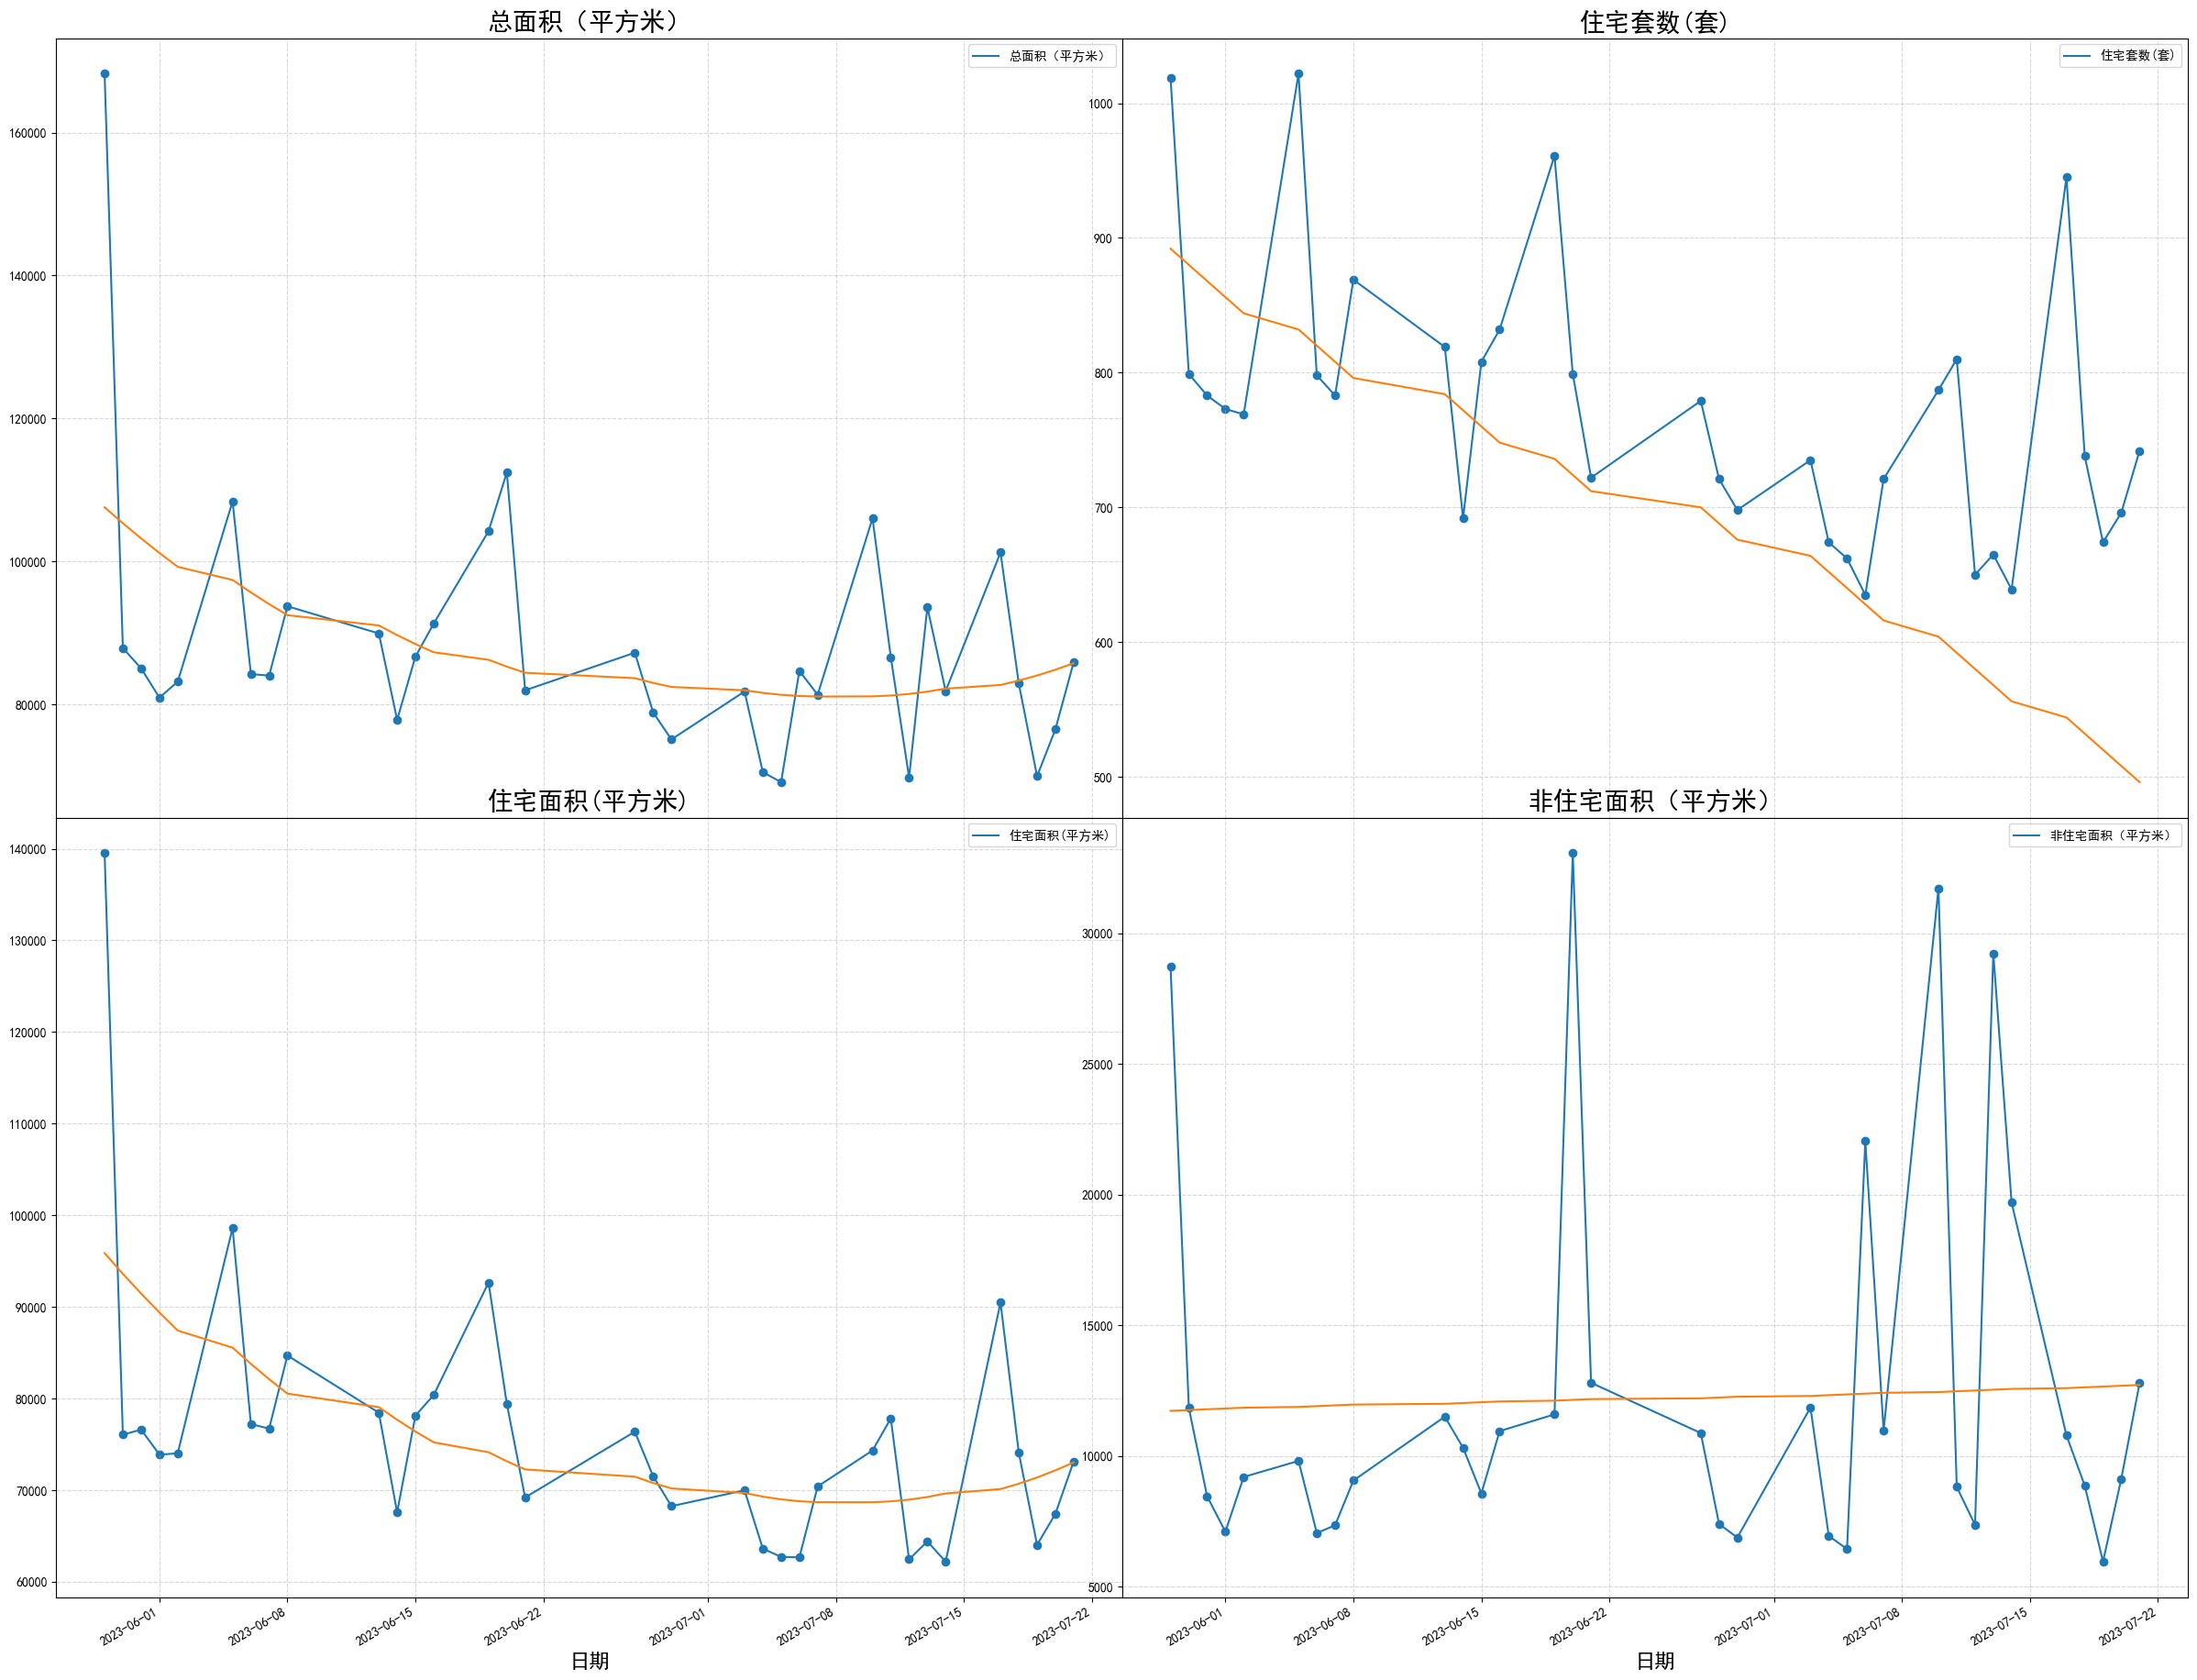

In [188]:
# 成都 二手房
date = cd_region_data_list[show_region_idx].index
show_lineplot(cd_region_data_list[show_region_idx], date, cd_columns)

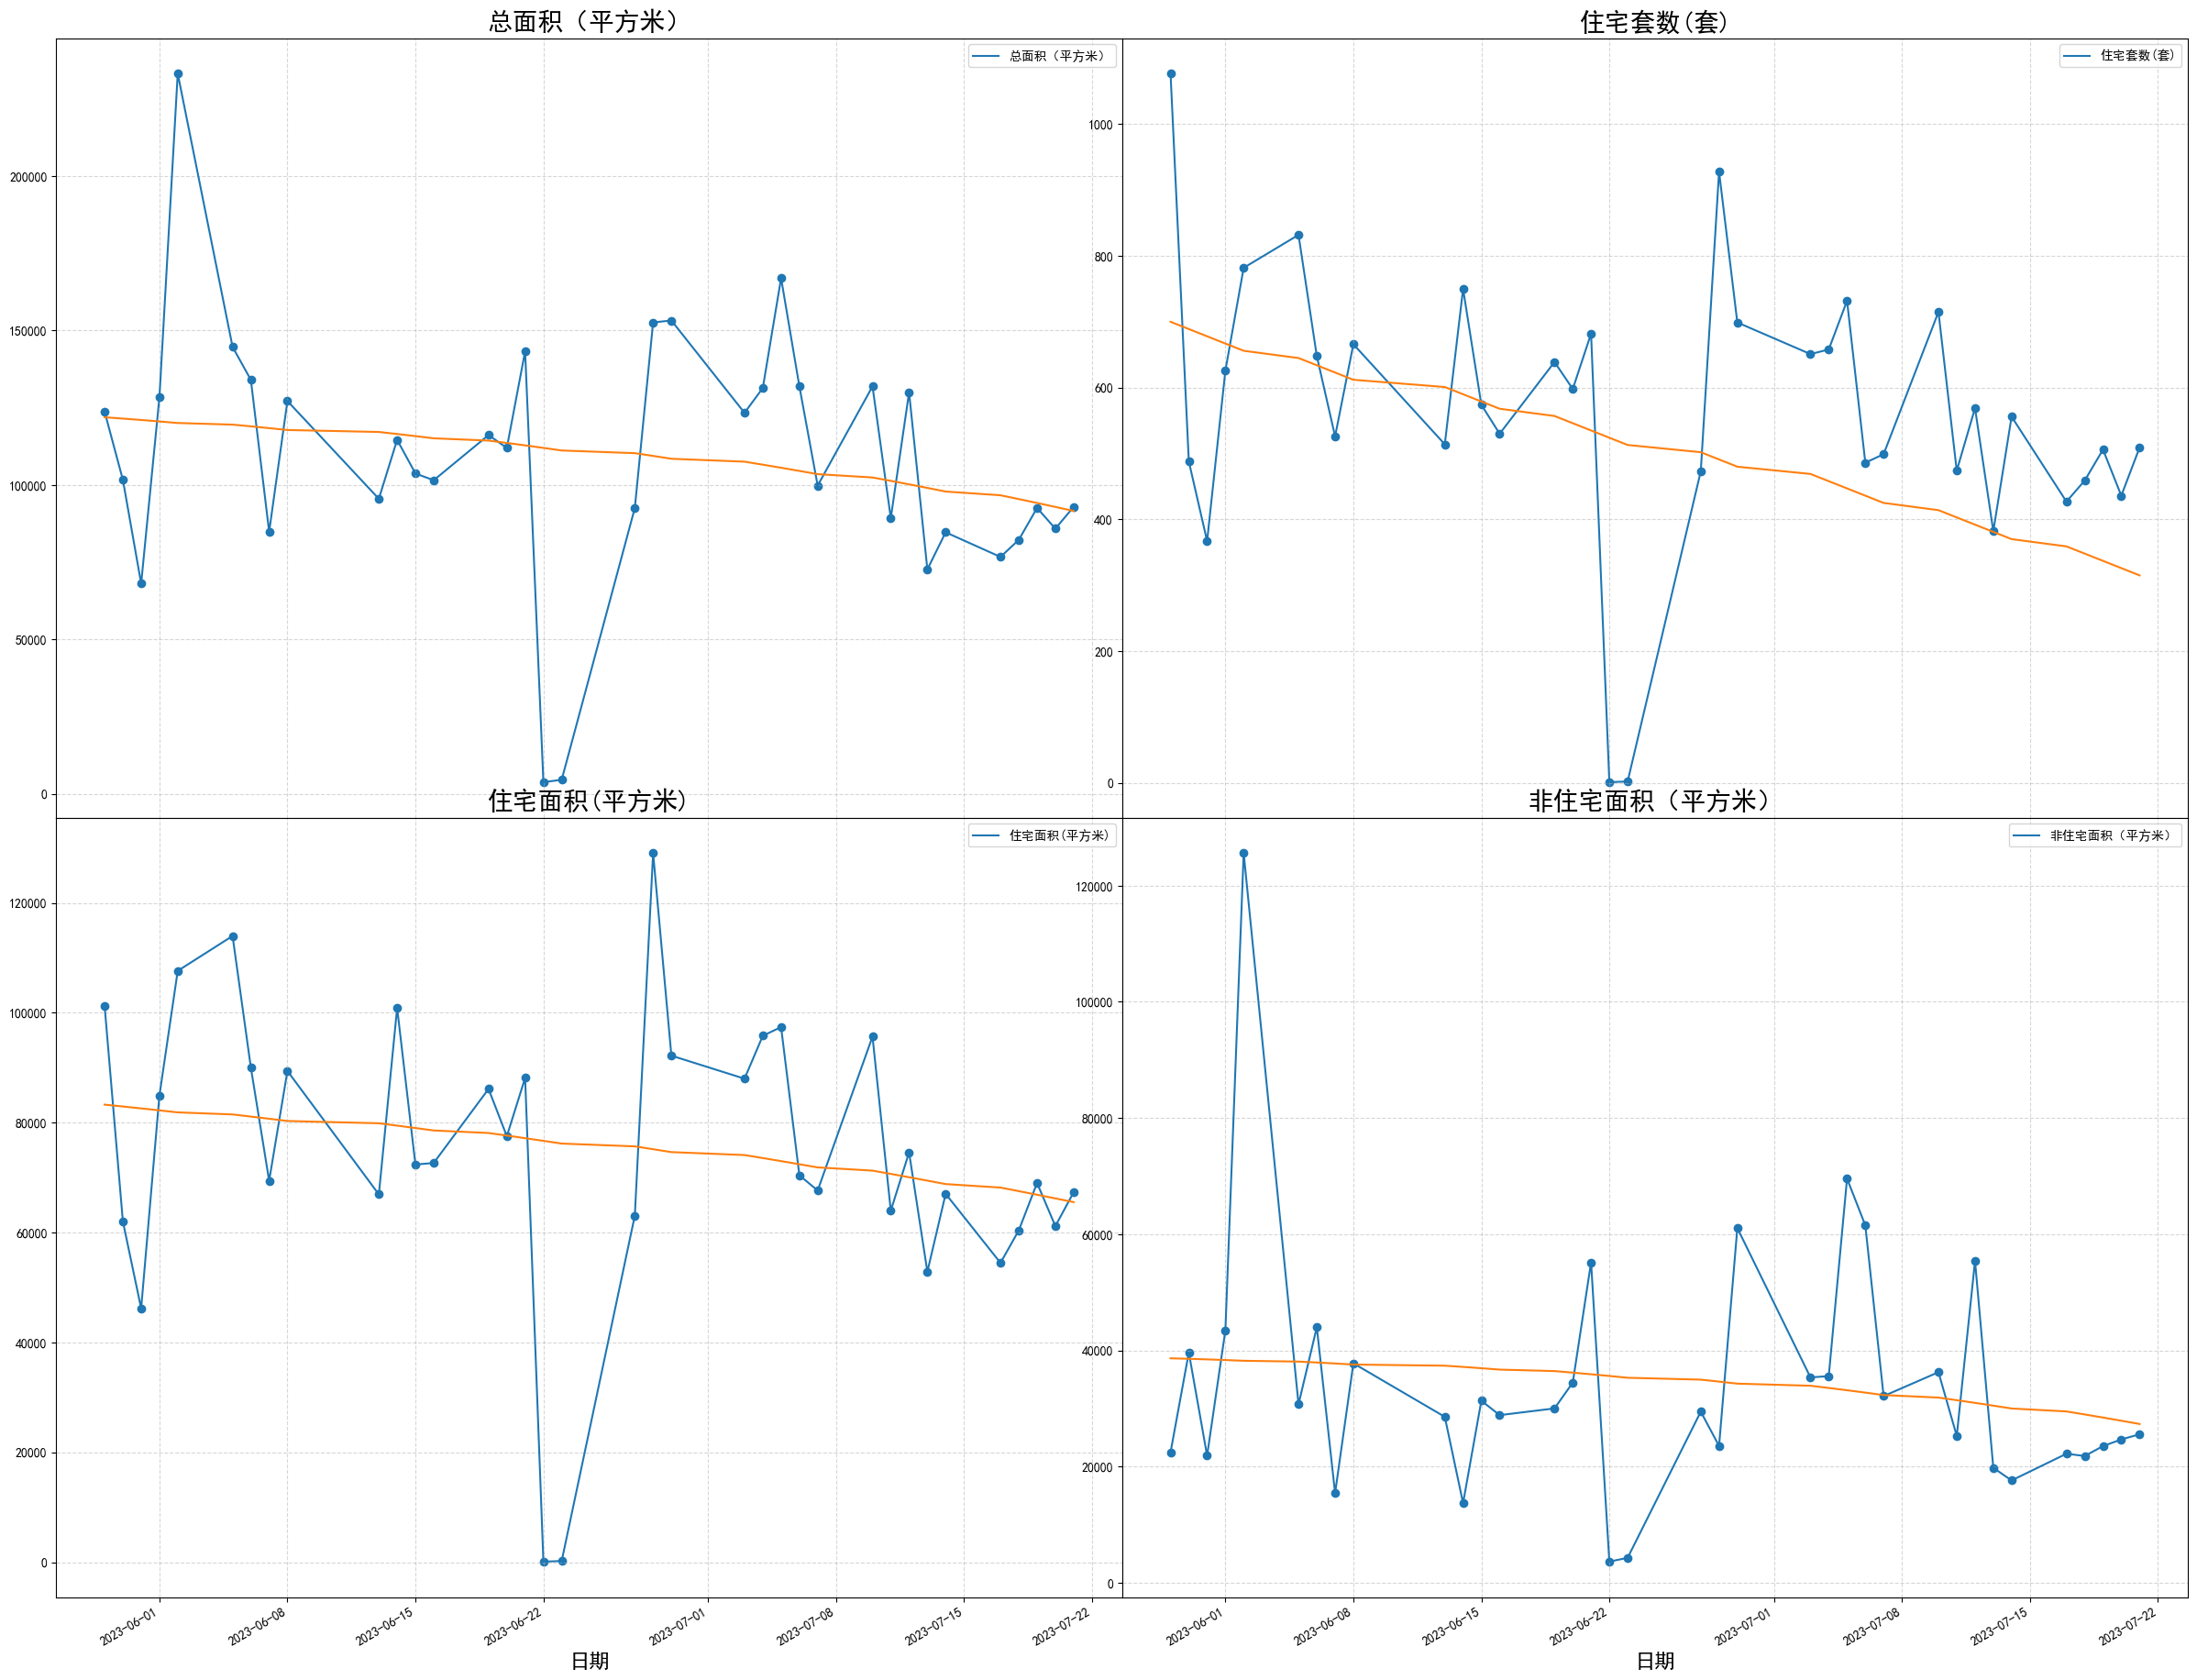

In [189]:
# 成都 商品房
date = cd_region_data_list2[show_region_idx].index
show_lineplot(cd_region_data_list2[show_region_idx], date, cd_columns)